# In-Depth: Support Vector Machines

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

## Support Vector Machines - Hard margin

In [86]:
# prepare the data
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.60)

In [65]:
# Fitting a support vector machine, note the C is very large.
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10) #default value of C is 1.0
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [66]:
# print the function (bounary)
model.coef_, model.intercept_

(array([[ 0.27764713, -1.66238549]]), array([4.05537158]))

In [67]:
# print the margin
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [1.35139348, 2.06383637]])

### visualization

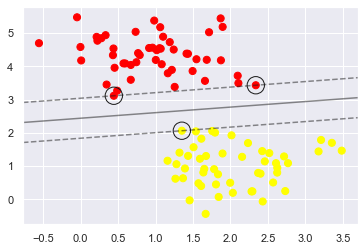

In [81]:
# plot the plots
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
tx = np.linspace(xlim[0], xlim[1], 30)
ty = np.linspace(ylim[0], ylim[1], 30)
tY, tX = np.meshgrid(ty, tx)
txy = np.vstack([tX.ravel(), tY.ravel()]).T
P = model.decision_function(txy).reshape(tX.shape)
    
# plot decision boundary and margins
ax.contour(tX, tY, P, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--']);
    
# point out the support margin    
ax.scatter(model.support_vectors_[:, 0],
           model.support_vectors_[:, 1],
           s=300, linewidth=1, facecolors='none', edgecolor = 'k');
ax.set_xlim(xlim);
ax.set_ylim(ylim);

## SVM - Soft margin

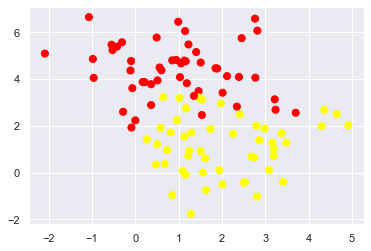

In [111]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [116]:
# Fitting a support vector machine, note the C is the hyparameter
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=0.1) #default value of C is 1.0
model.fit(X, y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

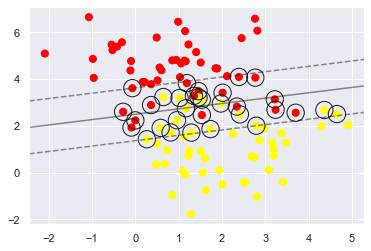

In [117]:
# plot the plots
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
tx = np.linspace(xlim[0], xlim[1], 30)
ty = np.linspace(ylim[0], ylim[1], 30)
tY, tX = np.meshgrid(ty, tx)
txy = np.vstack([tX.ravel(), tY.ravel()]).T
P = model.decision_function(txy).reshape(tX.shape)
    
# plot decision boundary and margins
ax.contour(tX, tY, P, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--']);
    
# point out the support margin    
ax.scatter(model.support_vectors_[:, 0],
           model.support_vectors_[:, 1],
           s=300, linewidth=1, facecolors='none', edgecolor = 'k');
ax.set_xlim(xlim);
ax.set_ylim(ylim);

## non-linear SVM with kernal

In [93]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

model = SVC(kernel='linear', C = 5).fit(X, y) # it won't work well

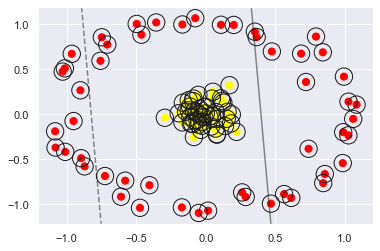

In [94]:
### visualization, as you can see, it is just a mess.
# plot the plots
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
tx = np.linspace(xlim[0], xlim[1], 30)
ty = np.linspace(ylim[0], ylim[1], 30)
tY, tX = np.meshgrid(ty, tx)
txy = np.vstack([tX.ravel(), tY.ravel()]).T
P = model.decision_function(txy).reshape(tX.shape)
    
# plot decision boundary and margins
ax.contour(tX, tY, P, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--']);
    
# point out the support margin    
ax.scatter(model.support_vectors_[:, 0],
           model.support_vectors_[:, 1],
           s=300, linewidth=1, facecolors='none', edgecolor = 'k');
ax.set_xlim(xlim);
ax.set_ylim(ylim);

In [100]:
r = np.exp(-(X ** 2).sum(1)) # use radial basis kernal

In [101]:
# visualize the kernal method
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[30, -30], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(30, -30), value=30), IntSlider(value=30, descripti…

In [109]:
model = SVC(kernel='rbf', C=1E6, gamma = 'auto').fit(X, y) 
# kernal must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
#If none is given, ‘rbf’ will be used.
#gamma is import in rbf
#if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
#if ‘auto’, uses 1 / n_features.

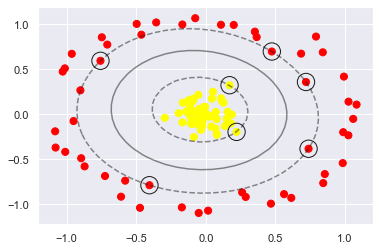

In [110]:
### visualization, as you can see, it works well.
# plot the plots
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
tx = np.linspace(xlim[0], xlim[1], 30)
ty = np.linspace(ylim[0], ylim[1], 30)
tY, tX = np.meshgrid(ty, tx)
txy = np.vstack([tX.ravel(), tY.ravel()]).T
P = model.decision_function(txy).reshape(tX.shape)
    
# plot decision boundary and margins
ax.contour(tX, tY, P, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--']);
    
# point out the support margin    
ax.scatter(model.support_vectors_[:, 0],
           model.support_vectors_[:, 1],
           s=300, linewidth=1, facecolors='none', edgecolor = 'k');
ax.set_xlim(xlim);
ax.set_ylim(ylim);

## Example: Face Recognition

As an example of support vector machines in action, let's take a look at the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures.
A fetcher for the dataset is built into Scikit-Learn:

In [118]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's plot a few of these faces to see what we're working with:

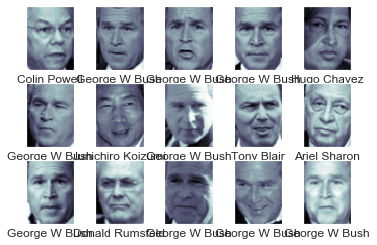

In [119]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Each image contains [62×47] or nearly 3,000 pixels.
We could proceed by simply using each pixel value as a feature, but often it is more effective to use some sort of preprocessor to extract more meaningful features; here we will use a principal component analysis to extract 150 fundamental components to feed into our support vector machine classifier.
We can do this most straightforwardly by packaging the preprocessor and the classifier into a single pipeline:

In [122]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

For the sake of testing our classifier output, we will split the data into a training and testing set:

In [125]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Finally, we can use a grid search cross-validation to explore combinations of parameters.
Here we will adjust ``C`` (which controls the margin hardness) and ``gamma`` (which controls the size of the radial basis function kernel), and determine the best model:

In [127]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 17.1 s
{'svc__C': 10, 'svc__gamma': 0.001}


The optimal values fall toward the middle of our grid; if they fell at the edges, we would want to expand the grid to make sure we have found the true optimum.

Now with this cross-validated model, we can predict the labels for the test data, which the model has not yet seen:

In [128]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Let's take a look at a few of the test images along with their predicted values:

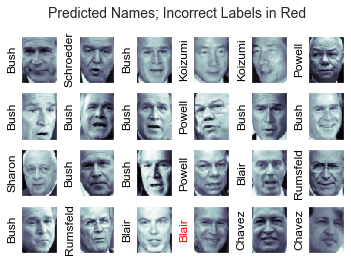

In [129]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

Out of this small sample, our optimal estimator mislabeled only a single face (Bush’s
face in the bottom row was mislabeled as Blair).
We can get a better sense of our estimator's performance using the classification report, which lists recovery statistics label by label:

In [130]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



We might also display the confusion matrix between these classes:

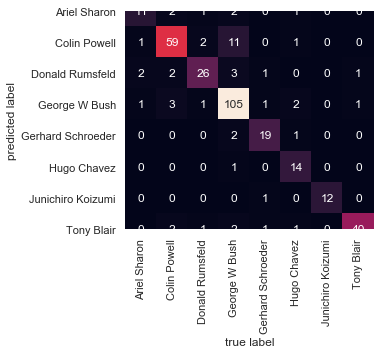

In [131]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

This helps us get a sense of which labels are likely to be confused by the estimator.

For a real-world facial recognition task, in which the photos do not come pre-cropped into nice grids, the only difference in the facial classification scheme is the feature selection: you would need to use a more sophisticated algorithm to find the faces, and extract features that are independent of the pixellation.
For this kind of application, one good option is to make use of [OpenCV](http://opencv.org), which, among other things, includes pre-trained implementations of state-of-the-art feature extraction tools for images in general and faces in particular.

## Support Vector Machine Summary

We have seen here a brief intuitive introduction to the principals behind support vector machines.
These methods are a powerful classification method for a number of reasons:

- Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
- Once the model is trained, the prediction phase is very fast.
- Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
- Their integration with kernel methods makes them very versatile, able to adapt to many types of data.

However, SVMs have several disadvantages as well:

- The scaling with the number of samples $N$ is $\mathcal{O}[N^3]$ at worst, or $\mathcal{O}[N^2]$ for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
- The results are strongly dependent on a suitable choice for the softening parameter $C$. This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
- The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the ``probability`` parameter of ``SVC``), but this extra estimation is costly.

With those traits in mind, I generally only turn to SVMs once other simpler, faster, and less tuning-intensive methods have been shown to be insufficient for my needs.
Nevertheless, if you have the CPU cycles to commit to training and cross-validating an SVM on your data, the method can lead to excellent results.